# Use Classification modelling to solve the below problem : -  Employee_Absent_Data.xlsx – file consisting of classification data. This data consists of employee level attendance data at work. The objective is to predict the probability of an employee to be absent for work
Column Absent_time_hours is the dependent variable
Column B to T are the independent variables
For understanding the data, refer to Attribute Information.docx


In [ ]:
import pandas as pd
import numpy as np
import yaml
import pickle
from sklearn import tree
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [285]:
df = pd.read_excel('Employee_Absent_Data.xlsx')
df.head(10)

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent_time_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239554,...,0,3,1,0,0,1,88,172,29,8


In [286]:
#checking the null values
df.isnull().sum()
#Looks clean

ID                              0
Absence_Reason                  0
Month_of_absence                0
Day_of_the_week                 0
Seasons                         0
Commute_cost                    0
Distance_from_Office_to_Work    0
Service_time                    0
Age                             0
Work_load_Average_per_day       0
Hit_target                      0
Disciplinary_failure            0
Education                       0
Son                             0
Social drinker                  0
Social smoker                   0
Pet                             0
Weight                          0
Height                          0
Body mass index                 0
Absent_time_hours               0
dtype: int64

In [287]:
df.columns

Index(['ID', 'Absence_Reason', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Commute_cost', 'Distance_from_Office_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absent_time_hours'],
      dtype='object')

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   ID                            740 non-null    int64
 1   Absence_Reason                740 non-null    int64
 2   Month_of_absence              740 non-null    int64
 3   Day_of_the_week               740 non-null    int64
 4   Seasons                       740 non-null    int64
 5   Commute_cost                  740 non-null    int64
 6   Distance_from_Office_to_Work  740 non-null    int64
 7   Service_time                  740 non-null    int64
 8   Age                           740 non-null    int64
 9   Work_load_Average_per_day     740 non-null    int64
 10  Hit_target                    740 non-null    int64
 11  Disciplinary_failure          740 non-null    int64
 12  Education                     740 non-null    int64
 13  Son                           740 n

In [289]:
df.describe()

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent_time_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Part 1 : What are the trends in employee nonattendance ? How do individual variables influence nonattendance ?

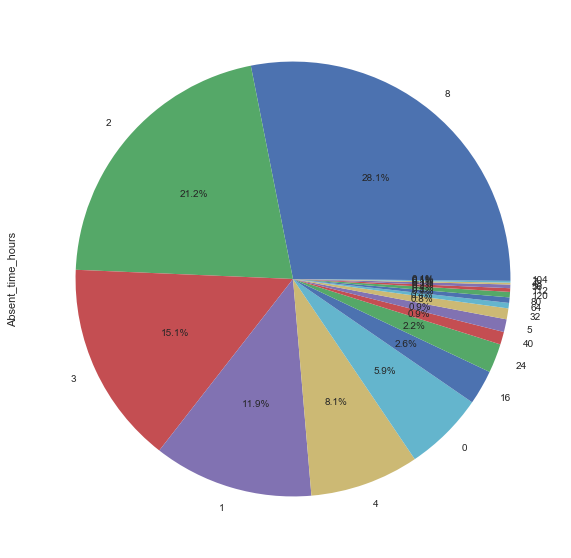

In [290]:
## Checking the class/dependent column && counts of label categories##
plt.figure(figsize=(20,10))
df['Absent_time_hours'].value_counts().plot.pie(autopct='%1.1f%%')

Above plot shows almost 28.1% people are majority having 8 hours as Absent time hours who belongs to non-attendance category

In [291]:
#EDA - checking the trends
# Visualize the distribution of absence
# Binarize the target variable (assuming absence is significant if hours are more than 0)

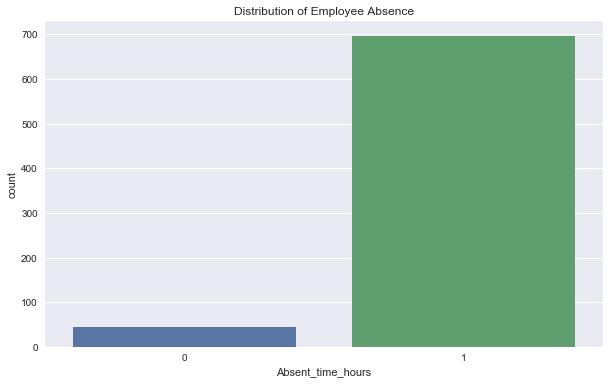

In [292]:
df['Absent_time_hours'] = (df['Absent_time_hours'] > 0).astype(int)
plt.figure(figsize=(10, 6))
sns.countplot(x='Absent_time_hours', data=df)
plt.title('Distribution of Employee Absence')
plt.show()

In [293]:
df.columns[1:-1]

Index(['Absence_Reason', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Commute_cost', 'Distance_from_Office_to_Work', 'Service_time', 'Age',
       'Work_load_Average_per_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index'],
      dtype='object')

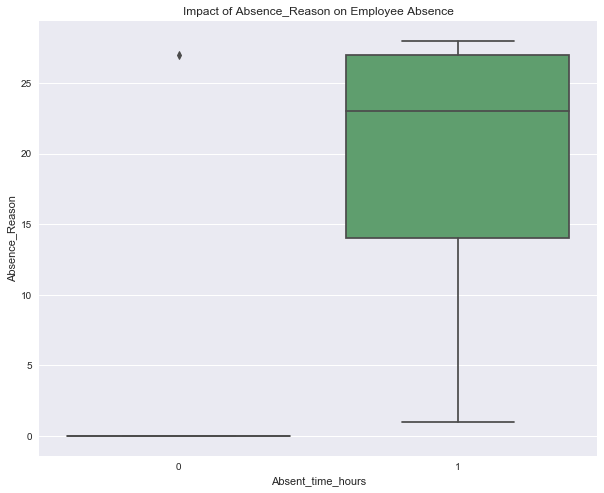

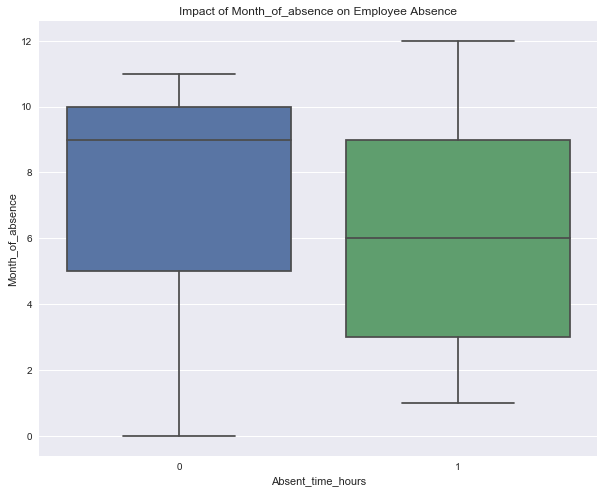

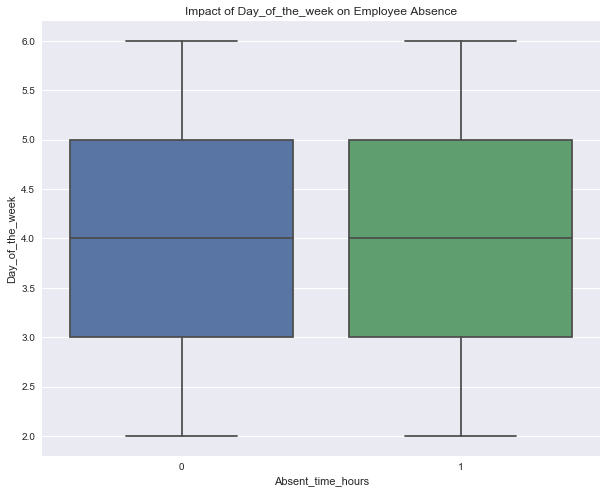

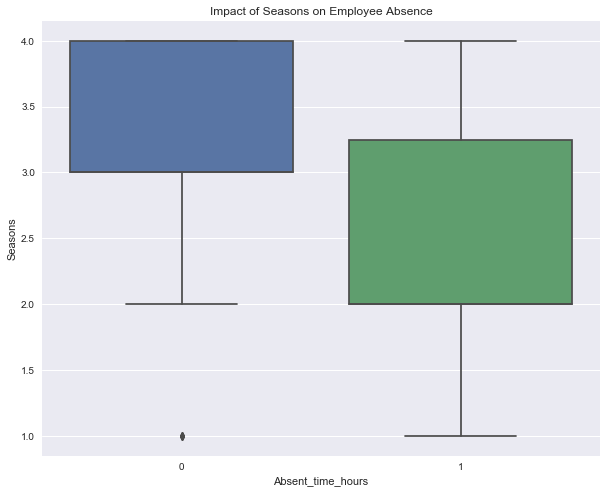

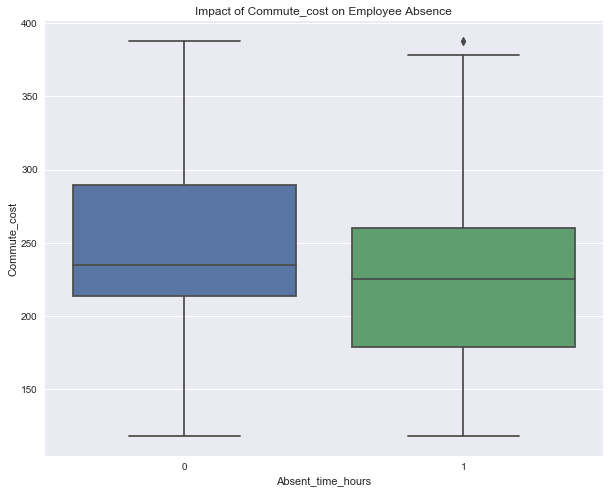

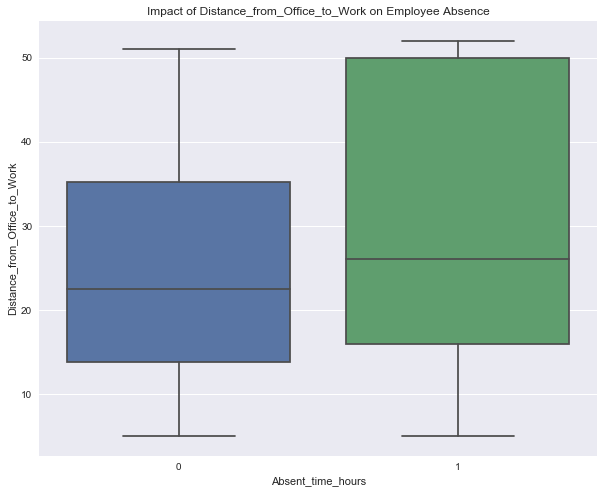

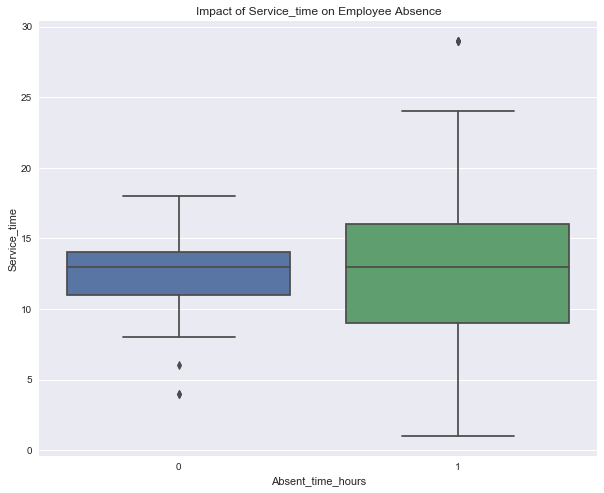

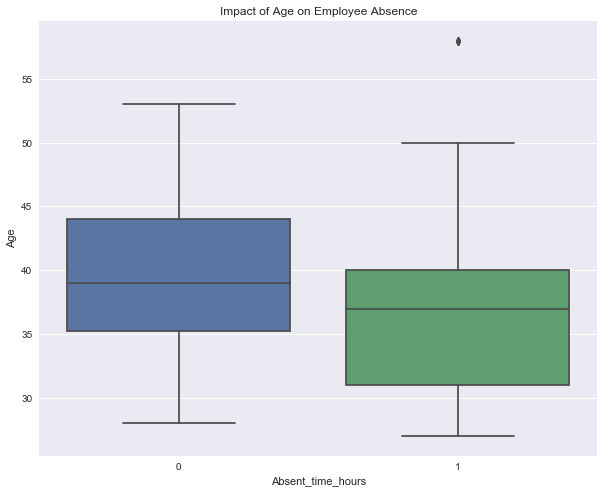

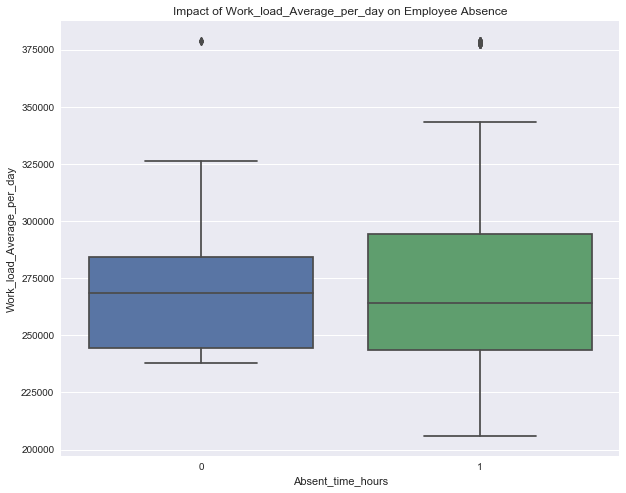

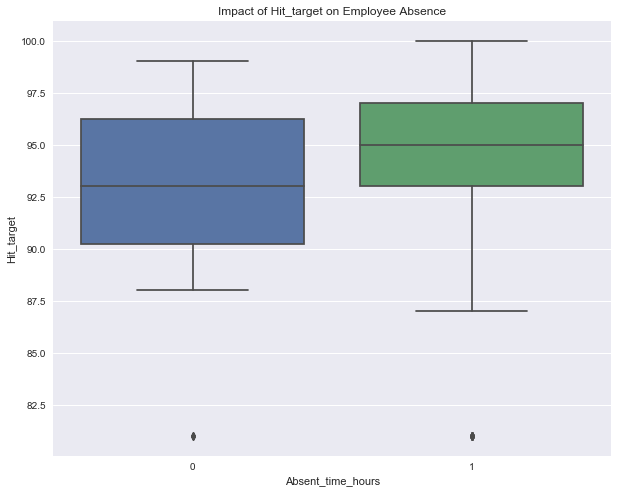

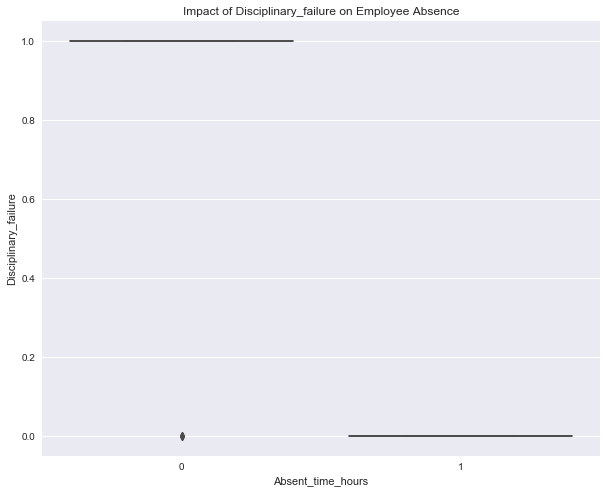

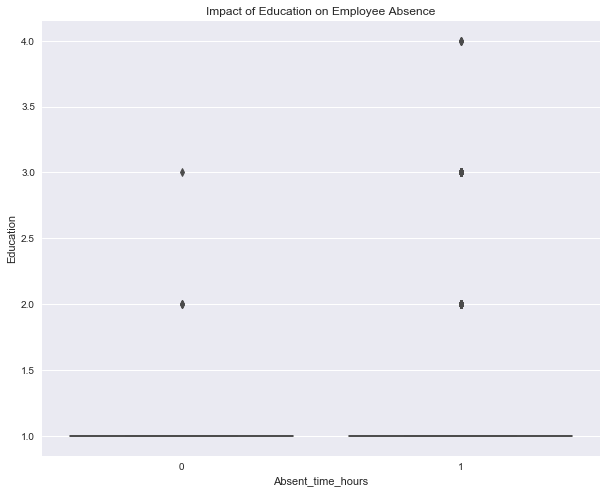

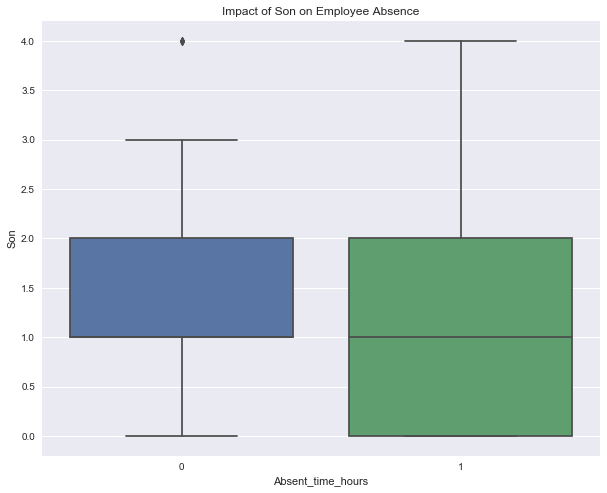

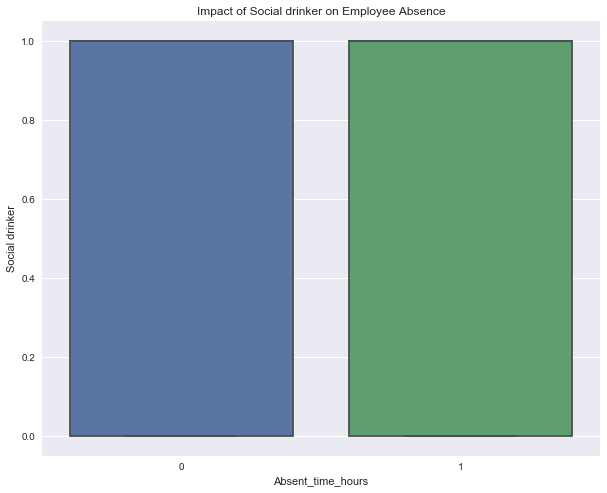

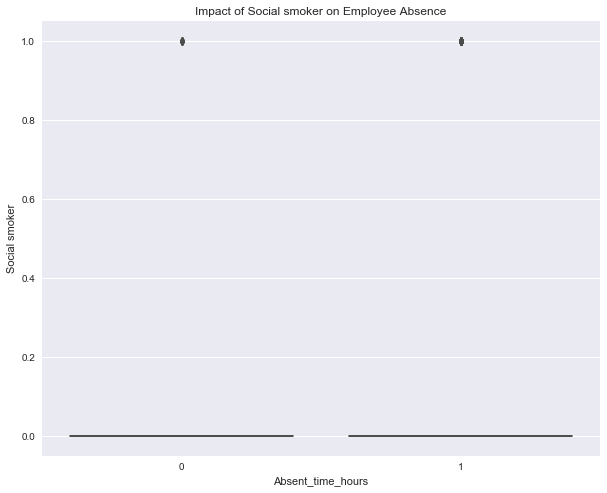

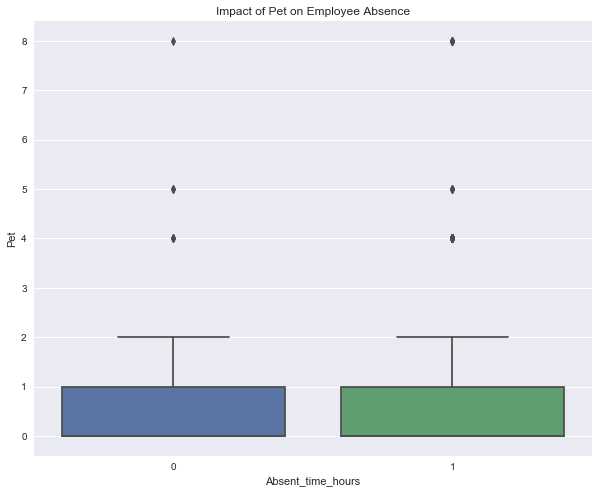

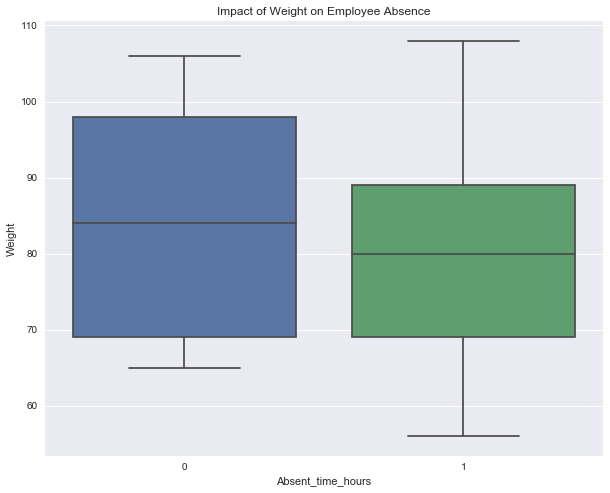

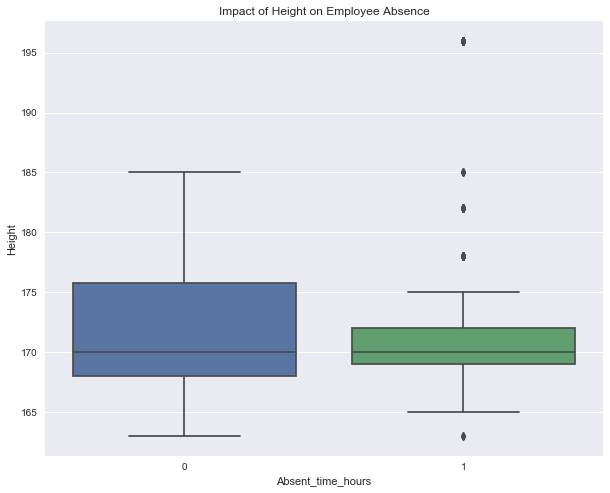

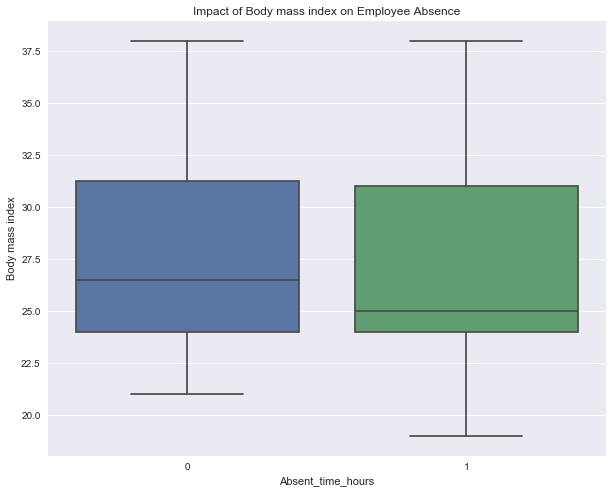

In [294]:
## # Visualizing the impact of individual independent variables towards the target variable
for col in df.columns[1:-1]:  # Excluding the target and ID columns
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Absent_time_hours', y=col, data=df)
    plt.title(f'Impact of {col} on Employee Absence')
    plt.show()

In [295]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

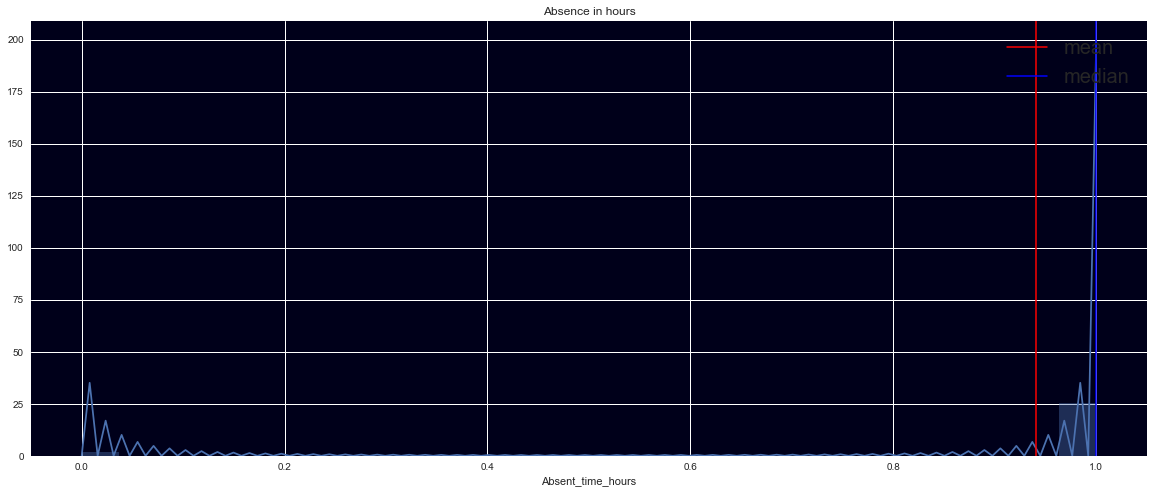

In [296]:
draw_distplot(column=df['Absent_time_hours'], title="Absence in hours")

In [ ]:
## Above plot we can see that precise mean Absence time hours is in between 0.94 & precise median of Absence time hours is 1.0

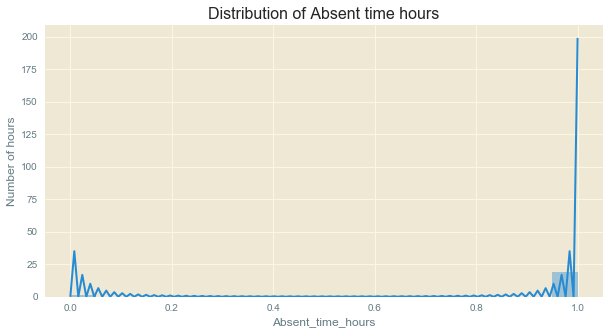

In [297]:
# Creating a distribution plot for 'Age'
age = df['Absent_time_hours'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('Solarize_Light2')
sns.distplot(df['Absent_time_hours'], bins=20)
plt.title('Distribution of Absent time hours')
plt.xlabel('Absent_time_hours')
plt.ylabel('Number of hours')
plt.tick_params(labelsize=10)
plt.show()

#Univariate Analysis

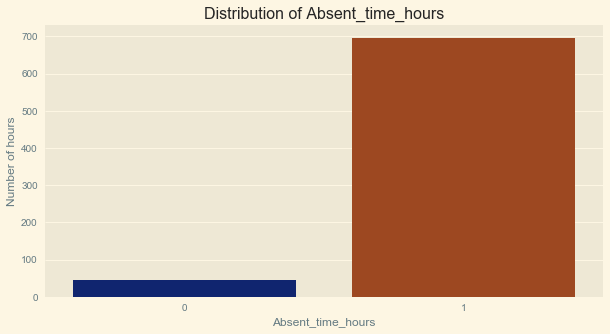

In [298]:
## Bar-Plot for the Absence in hours ##
income = df['Absent_time_hours'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(income.index, income.values, palette='dark')
plt.title('Distribution of Absent_time_hours')
plt.xlabel('Absent_time_hours')
plt.ylabel('Number of hours')
plt.tick_params(labelsize=10)
plt.show()

In [299]:
df.columns

Index(['ID', 'Absence_Reason', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Commute_cost', 'Distance_from_Office_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absent_time_hours'],
      dtype='object')

In [ ]:
# From above columns, trying to find some patterns which impacts the most towards the Absence time hours
# Columns like Absence_Reason, Month_of_absence, Seasons, Work_load_Average_per_day, Hit_target,

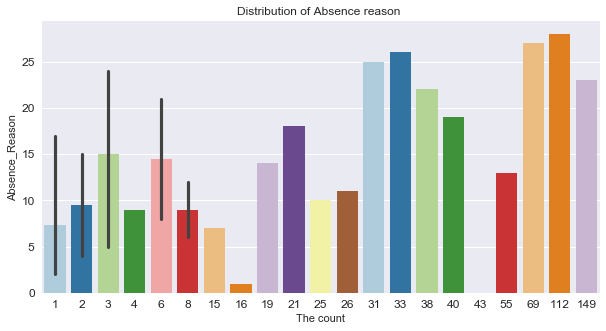

In [300]:
# Creating a barplot for 'Absence_Reason'
abs_reson = df['Absence_Reason'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(abs_reson.values, abs_reson.index, palette='Paired')
plt.title('Distribution of Absence reason ')
plt.xlabel('The count')
plt.ylabel('Absence_Reason')
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
# From above we can see that the Absence Reason-23 & 28 have the highest count

In [301]:
df['Absence_Reason'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [302]:
df['Absence_Reason'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Absence_Reason, dtype: int64

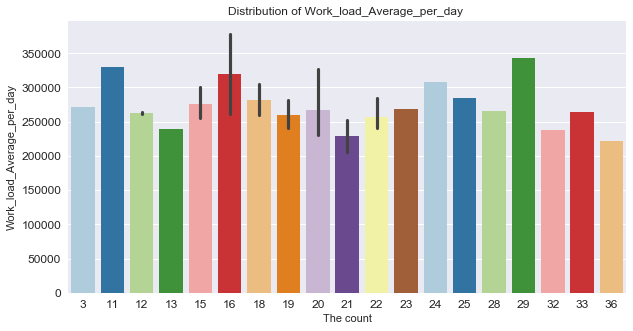

In [303]:
# Creating a barplot for 'Work_load_Average_per_day'
wl = df['Work_load_Average_per_day'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(wl.values, wl.index, palette='Paired')
plt.title('Distribution of Work_load_Average_per_day ')
plt.xlabel('The count')
plt.ylabel('Work_load_Average_per_day')
plt.tick_params(labelsize=12)
plt.show()

In [304]:
df['Work_load_Average_per_day'].unique()

array([239554, 205917, 241476, 253465, 306345, 261306, 308593, 302585,
       343253, 326452, 378884, 377550, 275312, 265615, 294217, 265017,
       284031, 236629, 330061, 251818, 244387, 239409, 246074, 253957,
       230290, 249797, 261756, 284853, 268519, 280549, 313532, 264249,
       222196, 246288, 237656, 275089, 264604, 271219], dtype=int64)

In [305]:
df['Work_load_Average_per_day'].value_counts()

222196    36
264249    33
237656    32
343253    29
265017    28
284853    25
308593    24
268519    23
284031    22
244387    22
241476    22
205917    21
251818    21
326452    20
246288    20
230290    20
236629    19
275089    19
239554    19
253957    19
294217    19
306345    18
253465    18
302585    18
265615    18
378884    16
246074    16
377550    16
275312    16
313532    15
261306    15
280549    15
249797    15
239409    13
261756    12
264604    12
330061    11
271219     3
Name: Work_load_Average_per_day, dtype: int64

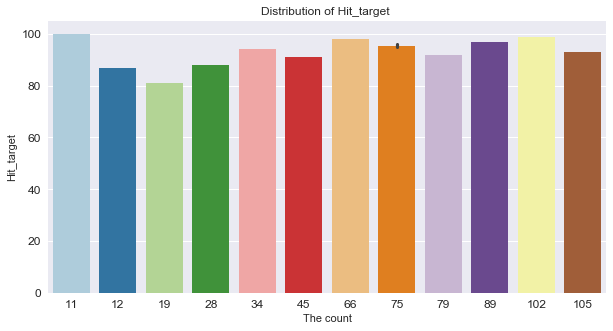

In [306]:
# Creating a barplot for 'Work_load_Average_per_day'
ht = df['Hit_target'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(ht.values, ht.index, palette='Paired')
plt.title('Distribution of Hit_target ')
plt.xlabel('The count')
plt.ylabel('Hit_target')
plt.tick_params(labelsize=12)
plt.show()

In [307]:
df['Hit_target'].value_counts()

93     105
99     102
97      89
92      79
96      75
95      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit_target, dtype: int64

In [308]:
df['Hit_target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

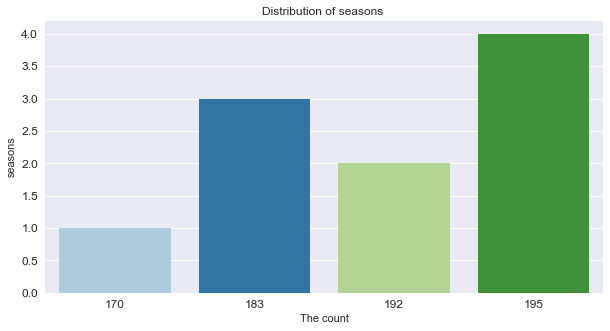

In [309]:
# Creating a barplot for 'Seasons'
Season_abs = df['Seasons'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(Season_abs.values, Season_abs.index, palette='Paired')
plt.title('Distribution of seasons ')
plt.xlabel('The count')
plt.ylabel('seasons')
plt.tick_params(labelsize=12)
plt.show()

In [310]:
df['Seasons'].unique()

array([1, 4, 2, 3], dtype=int64)

In [311]:
df['Seasons'].value_counts()

4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64

Doing the statistical analysis via Correlation checks

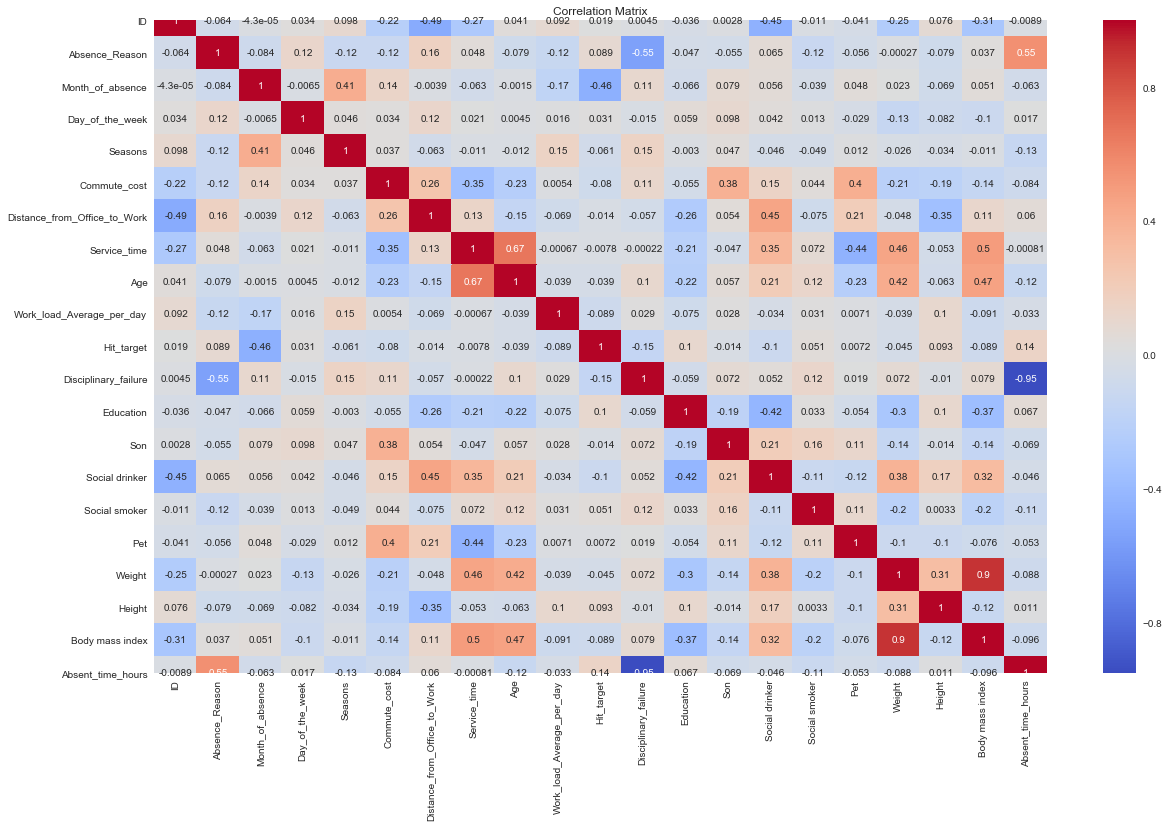

In [312]:
# Correlation Analysis
corr = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

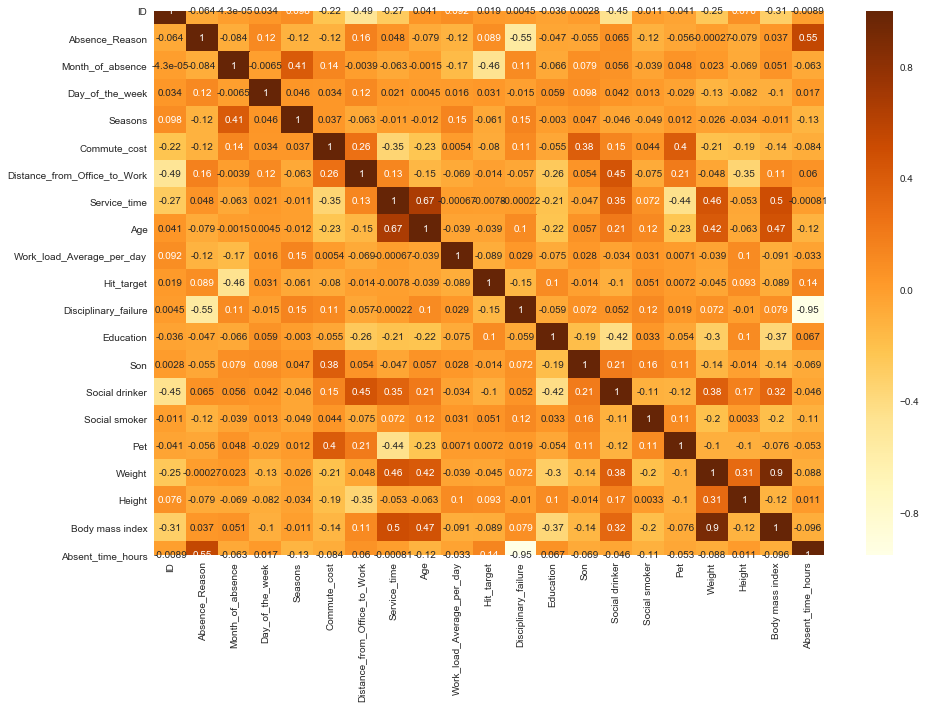

In [314]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlOrBr')

In [316]:
df.columns

Index(['ID', 'Absence_Reason', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Commute_cost', 'Distance_from_Office_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absent_time_hours'],
      dtype='object')

In [35]:
## Doing the Feature importance analysis using Random-Forest

In [317]:
# Binarize the target variable (assuming absence is significant if hours are more than 0)
df['Absent'] = (df['Absent_time_hours'] > 0).astype(int)
df

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent_time_hours,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,1,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,1,1
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,1,1
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,1,2,1,0,1,90,172,30,1,1
736,1,11,7,3,1,235,11,14,37,264604,...,3,1,0,0,1,88,172,29,1,1
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,1,0,8,98,170,34,0,0
738,8,0,0,4,2,231,35,14,39,271219,...,1,2,1,0,2,100,170,35,0,0


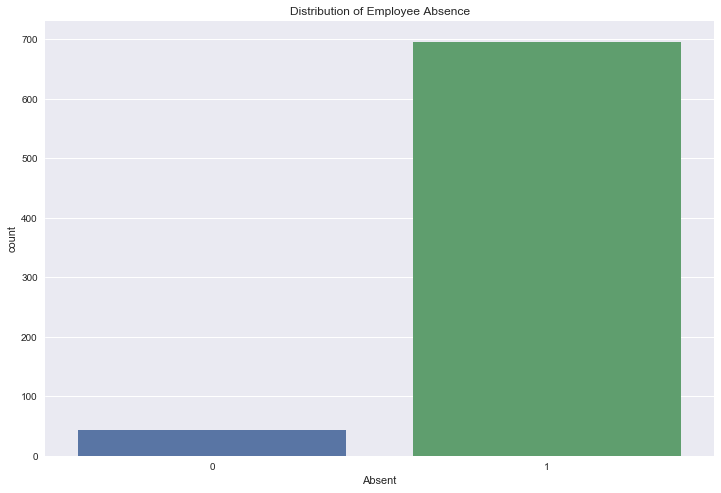

In [318]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of absence
plt.figure(figsize=(12, 8))
sns.countplot(x='Absent', data=df)
plt.title('Distribution of Employee Absence')
plt.show()

In [319]:
df.drop('Absent_time_hours', axis=1, inplace=True)

In [320]:
df.head(5)

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1


In [323]:
df2 = df.copy()

In [325]:
X = df.iloc[:, 1:-1]  # Excluding ID,Absent columns
y = df['Absent']

In [326]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
# Train a Random Forest Classifier
Rfc = RandomForestClassifier(random_state=42)
Rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [328]:
# The Feature importances
feature_importances = pd.DataFrame(Rfc.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

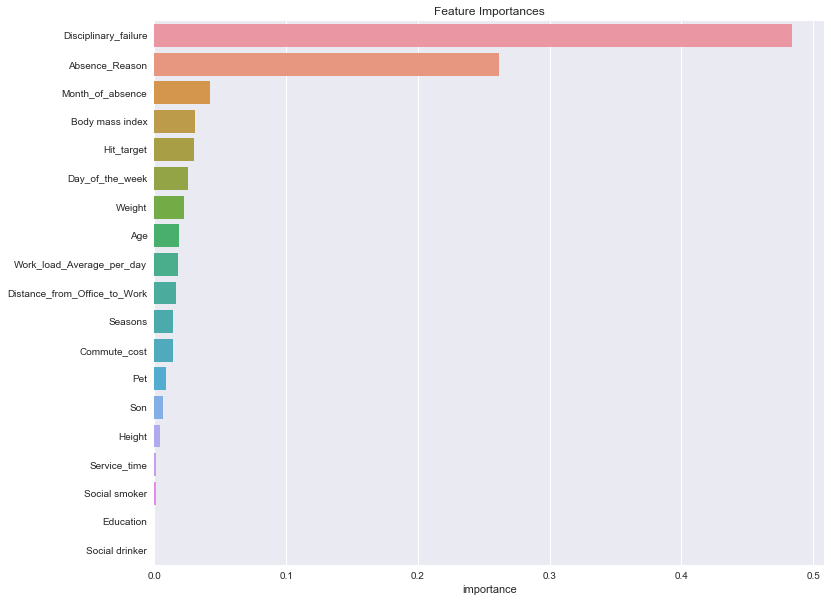

In [329]:
# Ploting the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

# Based on the correlation and feature importance plot it seems Social drinker, Education, Social ##smoker,
## Service Name, Height doesnt seems to be adding much significance towards the target variable.

In [330]:
feature_importances.to_csv('feature_importances.csv', index=True)

In [331]:
## doing further EDA to find some more patterns

def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

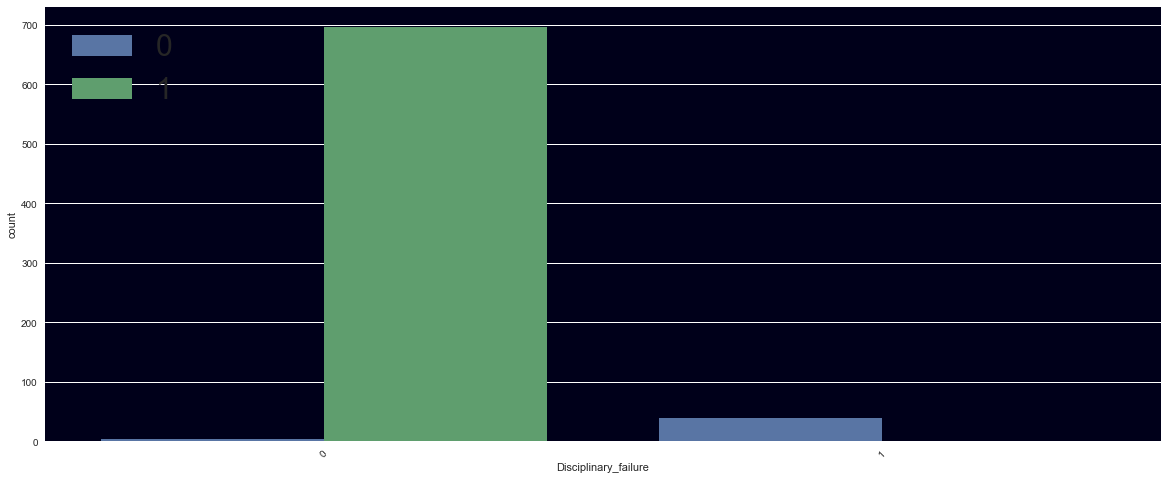

In [332]:
draw_countplot(countplot_x='Disciplinary_failure', countplot_hue='Absent', countplot_data=df)

In [333]:
df.columns

Index(['ID', 'Absence_Reason', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Commute_cost', 'Distance_from_Office_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absent'],
      dtype='object')

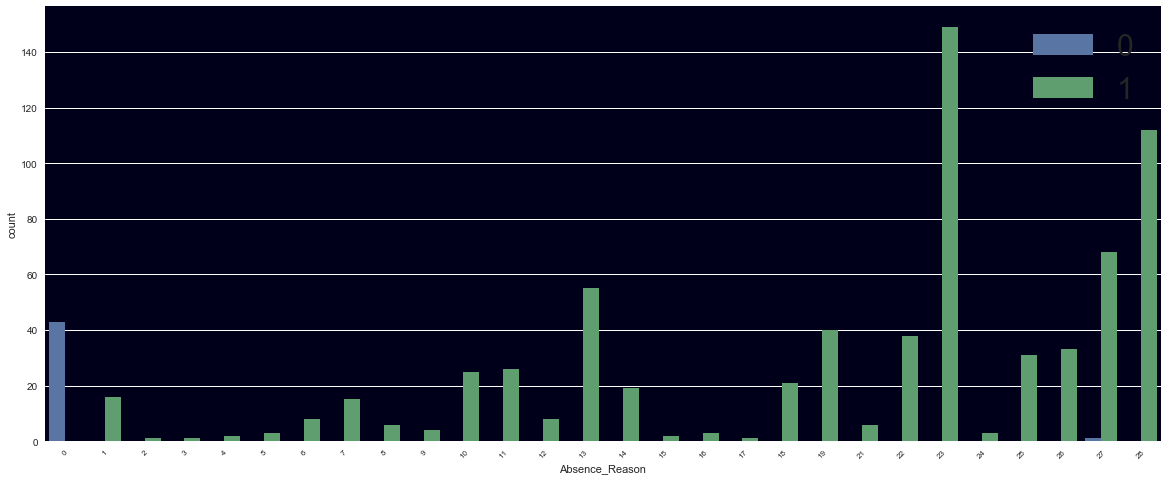

In [334]:
draw_countplot(countplot_x='Absence_Reason', countplot_hue='Absent', countplot_data=df)

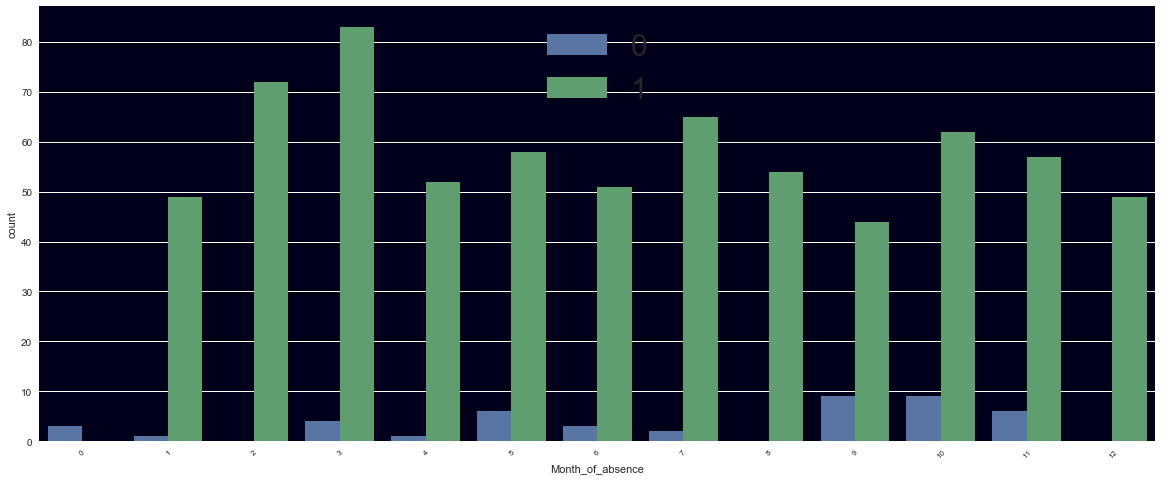

In [335]:
draw_countplot(countplot_x='Month_of_absence', countplot_hue='Absent', countplot_data=df)

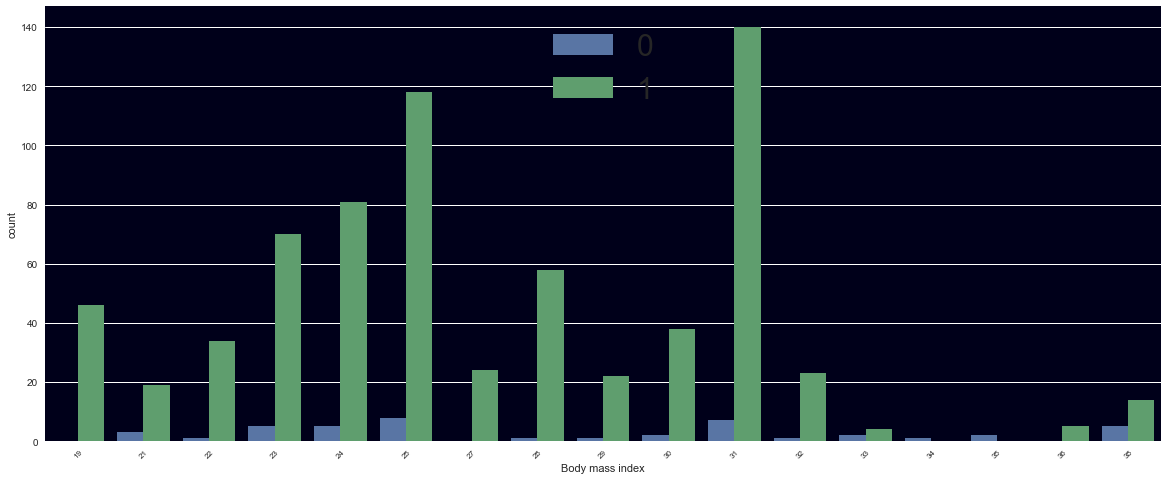

In [336]:
draw_countplot(countplot_x='Body mass index', countplot_hue='Absent', countplot_data=df)

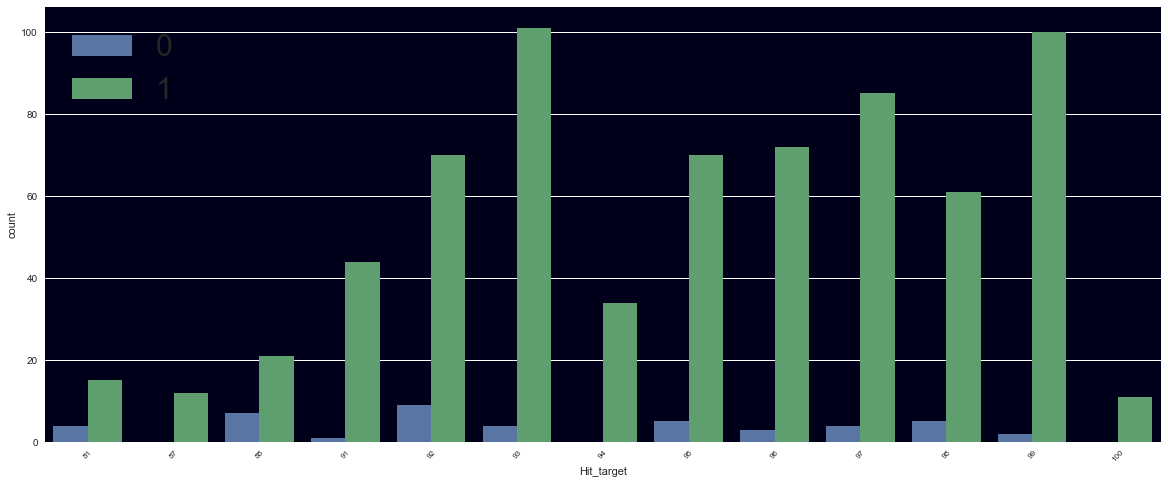

In [337]:
draw_countplot(countplot_x='Hit_target', countplot_hue='Absent', countplot_data=df)

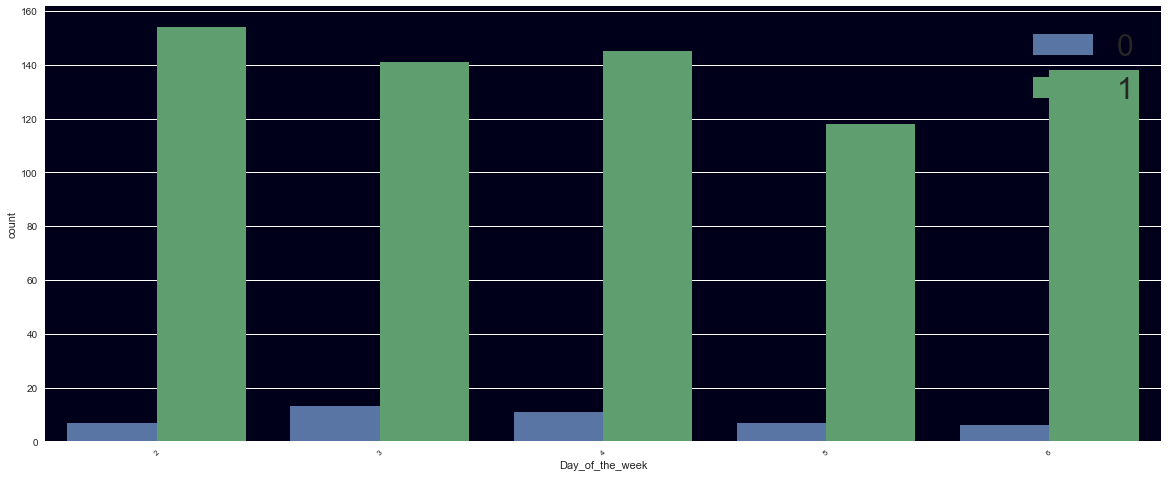

In [338]:
draw_countplot(countplot_x='Day_of_the_week', countplot_hue='Absent', countplot_data=df)

In [ ]:
## From the above EDA , Feature importances & correlation checkes, it's evidently seen the trends is driving based on
## the underlying independent variables like 
#Disciplinary_failure
#Absence_Reason
#Month_of_absence
#Body mass index
#Hit_target
#Day_of_the_week
#Weight
#Age
#Work_load_Average_per_day
#Distance_from_Office_to_Work
#Seasons

## It's pretty much evident that the organization must need to carve out the insights, analyze them and
## do the necessary changes from their end in order to avoid the situations like non-attendence.

# Part 2 - Develop a classifier to predict nonattendance in a company (dependent : Absent_time_hours) - Develop a robust modelling process (use proper hyperparameter tuning procedure to do the same)

In [339]:
df

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,1
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,1
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [340]:
df.isnull().sum()

ID                              0
Absence_Reason                  0
Month_of_absence                0
Day_of_the_week                 0
Seasons                         0
Commute_cost                    0
Distance_from_Office_to_Work    0
Service_time                    0
Age                             0
Work_load_Average_per_day       0
Hit_target                      0
Disciplinary_failure            0
Education                       0
Son                             0
Social drinker                  0
Social smoker                   0
Pet                             0
Weight                          0
Height                          0
Body mass index                 0
Absent                          0
dtype: int64

In [ ]:
## Checking the Feature importance using Select Transform method based on p-values ##

In [341]:
X1 = df.iloc[:, :-1]
Y1 = df.iloc[:, -1]

In [342]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, f_regression

In [343]:
SelectorK = SelectKBest(score_func=f_regression, k= 15)
x_k = SelectorK.fit_transform(X1, Y1)

In [344]:
x_k.shape

(740, 15)

In [345]:
f_Score = SelectorK.scores_
p_values = SelectorK.pvalues_

In [346]:
columns = list(X1.columns)

In [347]:
print(" ")
print(" ")
print(" ")

print("  Features ", "F-Score  ", "P-Values")
print("  --------     ----------   --------")

for i in range(0, len(columns)):
    f1 = "%4.2f" % f_Score[i]
    p1 = "%2.6f" % p_values[i]
    print("  ", columns[i].ljust(12), f1.rjust(8), " ", p1.rjust(12))

 
 
 
  Features  F-Score   P-Values
  --------     ----------   --------
   ID               0.06       0.808211
   Absence_Reason   328.50       0.000000
   Month_of_absence     2.92       0.087871
   Day_of_the_week     0.22       0.642142
   Seasons         13.48       0.000259
   Commute_cost     5.24       0.022303
   Distance_from_Office_to_Work     2.64       0.104947
   Service_time     0.00       0.982436
   Age             10.82       0.001051
   Work_load_Average_per_day     0.81       0.369052
   Hit_target      14.54       0.000149
   Disciplinary_failure  6941.19       0.000000
   Education        3.29       0.070118
   Son              3.48       0.062371
   Social drinker     1.60       0.206905
   Social smoker     8.26       0.004164
   Pet              2.07       0.151114
   Weight           5.71       0.017096
   Height           0.10       0.756424
   Body mass index     6.92       0.008722


In [348]:
cols = SelectorK.get_support(indices= True)
Selected_cols = X1.columns[cols].tolist()

In [349]:
print(Selected_cols)

['Absence_Reason', 'Month_of_absence', 'Seasons', 'Commute_cost', 'Distance_from_Office_to_Work', 'Age', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Body mass index']


In [ ]:
## Here are the list of Top Featurs if i need to pass the top most significant features into the model ##

In [350]:
## Now checking the features importance based on correlation ##
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [351]:
corr_features = correlation(df, 0.7)
print(len(set(corr_features))) 
print('\n')
corr_features

2




{'Absent', 'Body mass index'}

In [ ]:
## From above, its clear that we dont have the effect of multi-collinearity 

In [ ]:
## Checking the Dtypes of the columns

In [352]:
df.dtypes ## It seems we only have the numerical columns

ID                              int64
Absence_Reason                  int64
Month_of_absence                int64
Day_of_the_week                 int64
Seasons                         int64
Commute_cost                    int64
Distance_from_Office_to_Work    int64
Service_time                    int64
Age                             int64
Work_load_Average_per_day       int64
Hit_target                      int64
Disciplinary_failure            int64
Education                       int64
Son                             int64
Social drinker                  int64
Social smoker                   int64
Pet                             int64
Weight                          int64
Height                          int64
Body mass index                 int64
Absent                          int32
dtype: object

In [ ]:
## Checking the balances classes

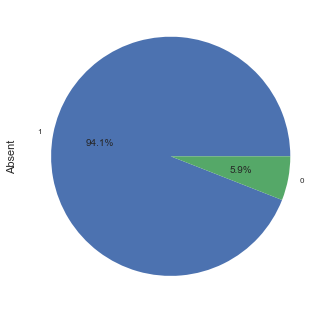

In [353]:
df['Absent'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
## Seeing above, it seems we have imbalanced classes where 94% belongs to Class-1 & 6% belongs to Class-0

In [354]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    94.05 %
0     5.95 %
Name: Absent, dtype: object

In [ ]:
## Using RandomOverSampler from IMBLearn to fix the imbalanced classes

In [355]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [356]:
ros.fit(X, y)

RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [357]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [358]:
y_resampled.shape, X_resampled.shape

((1392,), (1392, 19))

In [359]:
series_y_res = pd.Series(y_resampled)

# Use value_counts method
value_counts = round(series_y_res.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

print(value_counts)

1    50.0 %
0    50.0 %
dtype: object


In [91]:
## Now the target class is balanced and we can continue building Train/Test Split and Model building ##

In [ ]:
## Creating the split & Building the models,

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [361]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((1113, 19), (1113,), (279, 19), (279,))

1st Model - Building Ensemble Tree model like Decision Tree, RandomForest Classifier & XGBoost Classifier

In [362]:
Rfc = RandomForestClassifier(random_state=42)
Rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [363]:
Y_pred_Rfc = Rfc.predict(X_test)

In [364]:
Y_pred_Rfc

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [365]:
## Model Evaluation - Random Forest Classifier ##
Rfc_conf = confusion_matrix(y_test,Y_pred_Rfc)
Rfc_clas_report = classification_report(y_test,Y_pred_Rfc)

In [366]:
print(Rfc_conf )

[[132   0]
 [  3 144]]


In [367]:
print(Rfc_clas_report )

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       147

    accuracy                           0.99       279
   macro avg       0.99      0.99      0.99       279
weighted avg       0.99      0.99      0.99       279



In [368]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_Rfc) * 100, 2).astype('str') + ' %')
print('F1 score:', round(f1_score(y_test, Y_pred_Rfc) * 100, 2).astype('str') + ' %')
print('Precision score:', round(precision_score(y_test, Y_pred_Rfc) * 100, 2).astype('str') + ' %')
print('Recall score:', round(recall_score(y_test, Y_pred_Rfc) * 100, 2).astype('str') + ' %')

Random Forest Classifier:
Accuracy score: 98.92 %
F1 score: 98.97 %
Precision score: 100.0 %
Recall score: 97.96 %


In [369]:
## AUC-ROC for Random Forest Classifier ##
y_prob_rfc = Rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_prob_rfc)
AUC_RFC = round(roc_auc_score(y_test,y_prob_rfc)* 100, 2).astype('str') + ' %'
print(AUC_RFC)

100.0 %


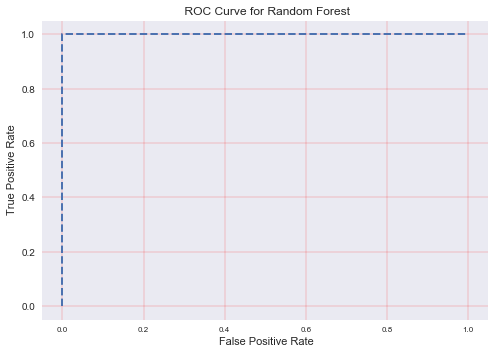

In [370]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Random Forest')
plt.grid(color='r', linestyle='-', linewidth=0.2)

2nd Model - XGBoost Classifier

In [372]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [373]:
from xgboost import XGBClassifier
xg_boost = XGBClassifier()
xg_boost.fit(X2_train, y2_train)

[21:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [374]:
Y_pred_xgb = xg_boost.predict(X2_test)
Y_pred_xgb

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [375]:
## Model Evaluation - XGBoost Classifier ##
XGB_conf = confusion_matrix(y2_test,Y_pred_xgb)
XGB_clas_report = classification_report(y2_test,Y_pred_xgb)

In [376]:
print(XGB_conf)

[[132   0]
 [  0 147]]


In [377]:
print(XGB_clas_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       147

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [378]:
print('XGBoost Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_xgb) * 100, 2).astype('str') + ' %')
print('F1 score:', round(f1_score(y2_test, Y_pred_xgb) * 100, 2).astype('str') + ' %')
print('Precision score:', round(precision_score(y2_test, Y_pred_xgb) * 100, 2).astype('str') + ' %')
print('Recall score:', round(recall_score(y2_test, Y_pred_xgb) * 100, 2).astype('str') + ' %')

XGBoost Classifier:
Accuracy score: 100.0 %
F1 score: 100.0 %
Precision score: 100.0 %
Recall score: 100.0 %


In [379]:
## AUC-ROC for XGBoost Classifier ##
y2_prob_xgb = xg_boost.predict_proba(X2_test)[:,1]
fpr, tpr, threshold = roc_curve(y2_test,y2_prob_xgb)
AUC_XGB = round(roc_auc_score(y2_test,y2_prob_xgb)* 100, 2).astype('str') + ' %'
print(AUC_XGB)

100.0 %


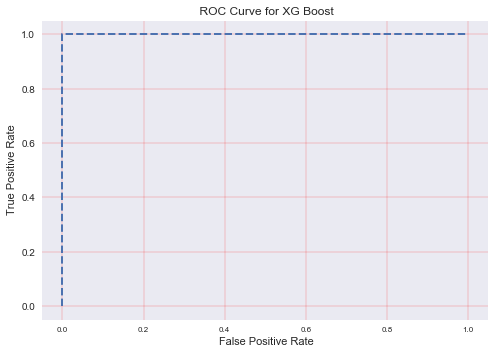

In [380]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for XG Boost')
plt.grid(color='r', linestyle='-', linewidth=0.2)

In [381]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((1113, 19), (279, 19), (1113,), (279,))

In [382]:
y2_train

array([0, 1, 0, ..., 0, 0, 0])

In [383]:
df

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,1
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,1
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


Feature Importance XGBoost

In [384]:
from xgboost import plot_importance
from matplotlib import pyplot

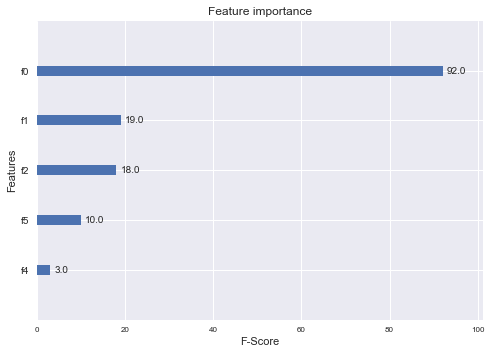

In [385]:
plot_importance(xg_boost, height=0.2, xlabel='F-Score', ylabel='Features',max_num_features=20)
pyplot.show()

Decision Tree Classifier

In [386]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [387]:
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X3_train,y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [388]:
Y_pred_d_tree = d_tree.predict(X3_test)

In [389]:
Y_pred_d_tree

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [390]:
## Model Evaluation - Decision Tree Classifier ##
Dtree_conf = confusion_matrix(y3_test,Y_pred_d_tree)
Dtree_clas_report = classification_report(y3_test,Y_pred_d_tree)

In [391]:
print(Dtree_conf )

[[132   0]
 [  1 146]]


In [392]:
print(Dtree_clas_report )

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       132
           1       1.00      0.99      1.00       147

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [393]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y3_test, Y_pred_d_tree) * 100, 2).astype('str') + ' %')
print('F1 score:', round(f1_score(y3_test, Y_pred_d_tree) * 100, 2).astype('str') + ' %')
print('Precision score:', round(precision_score(y3_test, Y_pred_d_tree) * 100, 2).astype('str') + ' %')
print('Recall score:', round(recall_score(y3_test, Y_pred_d_tree) * 100, 2).astype('str') + ' %')

Decision Tree Classifier:
Accuracy score: 99.64 %
F1 score: 99.66 %
Precision score: 100.0 %
Recall score: 99.32 %


In [394]:
## AUC-ROC for Decision Tree Classifier ##
y_prob_dtree = d_tree.predict_proba(X3_test)[:,1]
fpr, tpr, threshold = roc_curve(y3_test,y_prob_dtree)
AUC_Dtree = round(roc_auc_score(y3_test,y_prob_dtree)* 100, 2).astype('str') + ' %'
print(AUC_Dtree)

99.99 %


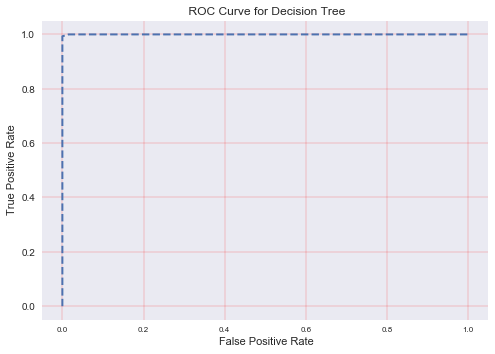

In [395]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Decision Tree')
plt.grid(color='r', linestyle='-', linewidth=0.2)

Checking the possibility of Overfitting using Cross Validated Method for D-Tree, Random Forest, XGBoost & Hypertuned Random Forest

In [396]:
df.head()

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1


In [397]:
# Import Cross Validate #
from sklearn.model_selection import cross_validate
## We already have the below estimators for Logistic, KNN, D-Tree, RFC, XGBoost intialized , so will use that ##
print(' Creating cross validate jobs for 10 folds for the provided estimators.....')
cv_results_dtc = cross_validate(d_tree, X, y, cv=10, return_train_score=True)
cv_results_rfc = cross_validate(Rfc, X, y, cv=10, return_train_score=True)
cv_results_xgb = cross_validate(xg_boost, X, y, cv=10, return_train_score=True)
print('Done!!!!!')

 Creating cross validate jobs for 10 folds for the provided estimators.....
[21:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

In [398]:
## Calculating Average Train Scores ##
dtc_train_average = np.average(cv_results_dtc['train_score'])
rfc_train_average = np.average(cv_results_rfc['train_score'])
xgb_train_average = np.average(cv_results_xgb['train_score'])


In [399]:
## Calculating Average Test Scores ##
dtc_test_average = np.average(cv_results_dtc['test_score'])
rfc_test_average = np.average(cv_results_rfc['test_score'])
xgb_test_average = np.average(cv_results_xgb['test_score'])


In [400]:
## Overfitting check by checking difference between avg Train/Test score.
## Lesser the distance between them , less chance of overfitting.
# print the results 
print()
print()
print('        ','Decision Tree  ', 'Random Forest  ','     XGBoost   ')
print('        ','---------------', '---------------','-----------------')

print('Test  : ',
      round(dtc_test_average, 4), '        ',
      round(rfc_test_average, 4), '        ',
      round(xgb_test_average, 4))

print('Train : ',
      round(dtc_train_average, 4), '        ',
      round(rfc_train_average, 4), '        ',
      round(xgb_train_average, 4))




         Decision Tree   Random Forest        XGBoost   
         --------------- --------------- -----------------
Test  :  0.9946          0.9946          0.9987
Train :  0.9986          0.9986          0.9986


In [ ]:
0.9766 - 0.8496 # XGBoost train/test avg difference score is less, hence will not overfit the model

In [ ]:
## Logistic Regression model

In [401]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

In [402]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [403]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),])

In [404]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [405]:
# Define the model pipeline with preprocessing and Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('log_reg', LogisticRegression(random_state=42))])

In [414]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [415]:
log_reg.fit(X4_train,y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [416]:
log_pred = log_reg.predict(X4_test)
log_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [417]:
## Model Evaluation - Decision Tree Classifier ##
log_reg_conf = confusion_matrix(y4_test,log_pred)
log_reg_clas_report = classification_report(y4_test,log_pred)

In [418]:
print(log_reg_conf )

[[130   2]
 [ 10 137]]


In [419]:
print(log_reg_clas_report )

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       132
           1       0.99      0.93      0.96       147

    accuracy                           0.96       279
   macro avg       0.96      0.96      0.96       279
weighted avg       0.96      0.96      0.96       279



In [428]:
print('Logistic Regression Classifier:')
print('Accuracy score:', round(accuracy_score(y4_test, log_pred) * 100, 2).astype('str') + ' %')
print('F1 score:', round(f1_score(y4_test, log_pred) * 100, 2).astype('str') + ' %')
print('Precision score:', round(precision_score(y4_test, log_pred) * 100, 2).astype('str') + ' %')
print('Recall score:', round(recall_score(y4_test, log_pred) * 100, 2).astype('str') + ' %')

Logistic Regression Classifier:
Accuracy score: 95.7 %
F1 score: 95.8 %
Precision score: 98.56 %
Recall score: 93.2 %


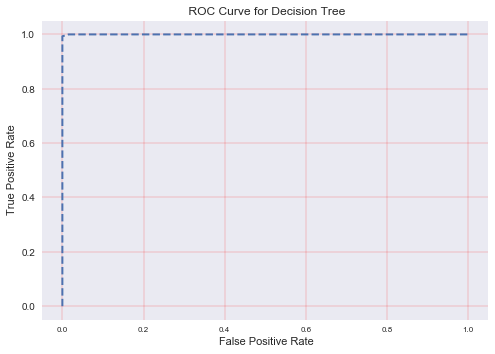

In [427]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Decision Tree')
plt.grid(color='r', linestyle='-', linewidth=0.2)

In [429]:
print(' Creating cross validate jobs for 10 folds for the provided Logictic estimators.....')
cv_results_log = cross_validate(log_reg, X, y, cv=10, return_train_score=True)
print('Done!!!!!')

 Creating cross validate jobs for 10 folds for the provided Logictic estimators.....
Done!!!!!


In [430]:
## Calculating Average Train Scores ##
log_train_average = np.average(cv_results_log['train_score'])


In [431]:
## Calculating Average Test Scores ##
log_test_average = np.average(cv_results_log['test_score'])

In [432]:
## Overfitting check by checking difference between avg Train/Test score.
## Lesser the distance between them , less chance of overfitting.
# print the results 
print()
print()
print('        ','Logistic Regression   ')
print('        ','----------------')

print('Test  : ', round(log_test_average, 4))

print('Train : ',round(log_train_average, 4))




         Logistic Regression   
         ----------------
Test  :  0.9689
Train :  0.9701


In [209]:
0.9701 - 0.9689

0.0011999999999999789

In [ ]:
## Applying GridSearchCV as fine tuning method

In [433]:
Rfc_param = {'n_estimators': [10, 15, 20],
            'min_samples_split': [8,16],
             'min_samples_leaf': [1,2,3,4,5]}

In [435]:
Rfc_tuned = RandomForestClassifier(random_state=42)

In [436]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [437]:
import warnings
warnings.filterwarnings('ignore')
print('Finding out the best params of Random Forest......')
Rfc_grid = GridSearchCV(estimator=Rfc_tuned, param_grid=Rfc_param, cv=10, return_train_score=True)
Rfc_grid.fit(X4_train, y4_train)
print('Done finding the Random Forest Params!!!')

Finding out the best params of Random Forest......
Done finding the Random Forest Params!!!


In [438]:
Rfc_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [439]:
Rfc_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}

In [440]:
Rfc_grid.best_score_

0.9982030548068284

In [443]:
# Evaluate the model on test set
y_pred_Rfc_tuned = Rfc_grid.predict(X4_test)
y_pred_tuned_proba = Rfc_grid.predict_proba(X4_test)[:, 1]

In [444]:
y_pred_Rfc_tuned

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [445]:
print('RFC GridSearch Classifier:')
print('Accuracy score:', round(accuracy_score(y4_test, y_pred_Rfc_tuned) * 100, 2).astype('str') + ' %')
print('F1 score:', round(f1_score(y4_test, y_pred_Rfc_tuned) * 100, 2).astype('str') + ' %')
print('Precision score:', round(precision_score(y4_test, y_pred_Rfc_tuned) * 100, 2).astype('str') + ' %')
print('Recall score:', round(recall_score(y4_test, y_pred_Rfc_tuned) * 100, 2).astype('str') + ' %')

RFC GridSearch Classifier:
Accuracy score: 98.92 %
F1 score: 98.97 %
Precision score: 100.0 %
Recall score: 97.96 %


# Part 3 - Showcase the model fit statistics by validating them against a holdout data. Explain the interpretation of each

In [446]:
df.head()

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1


In [225]:
df.to_csv("C:/Users/maniesh/Landmark/DLL Take Home Exercise/Trained.csv", index= False)

In [226]:
from sklearn.model_selection import train_test_split
X2 = df.drop("Absent", axis=1)
y2 = df["Absent"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=103, test_size=0.3)

In [227]:
print("y2_train | {}% responded positively".format(round((y2_train.value_counts()[1]/y2_train.value_counts()[0])*100,2)))
print("y2_test   | {}% responded positively".format(round((y2_test.value_counts()[1]/y2_test.value_counts()[0])*100,2)))

y2_train | 1469.7% responded positively
y2_test   | 1918.18% responded positively


In [228]:
X2_train

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
124,34,27,1,4,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
511,15,28,10,4,4,291,31,12,40,284853,91,0,1,1,1,0,1,73,171,25
166,20,26,3,2,2,260,50,11,36,343253,95,0,1,4,1,0,0,65,168,23
187,24,13,4,4,3,246,25,16,41,326452,96,0,1,0,1,0,0,67,170,23
58,13,0,9,4,4,369,17,12,31,241476,92,1,1,3,1,0,0,70,169,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,24,9,9,4,1,246,25,16,41,294217,81,0,1,0,1,0,0,67,170,23
241,22,18,7,5,1,179,26,9,30,275312,98,0,3,0,0,0,0,56,171,19
198,11,19,4,3,3,289,36,13,33,326452,96,0,1,2,1,0,1,90,172,30
347,3,28,12,6,4,179,51,18,38,236629,93,0,1,0,1,0,0,89,170,31


In [230]:
T_Train = pd.DataFrame(X2_train)

In [231]:
T_Train.to_csv('C:/Users/maniesh/Landmark/DLL Take Home Exercise/Testdata.csv', index= False) 

In [232]:
train_df = pd.read_csv('Trained.csv')
test_df = pd.read_csv('Testdata.csv')

In [233]:
train_df.shape,test_df.shape

((740, 21), (518, 20))

In [234]:
train_df.head()

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1


In [235]:
test_df.head()

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,34,27,1,4,2,118,10,10,37,308593,95,0,1,0,0,0,0,83,172,28
1,15,28,10,4,4,291,31,12,40,284853,91,0,1,1,1,0,1,73,171,25
2,20,26,3,2,2,260,50,11,36,343253,95,0,1,4,1,0,0,65,168,23
3,24,13,4,4,3,246,25,16,41,326452,96,0,1,0,1,0,0,67,170,23
4,13,0,9,4,4,369,17,12,31,241476,92,1,1,3,1,0,0,70,169,25


Model Building - RandomForest Classfier

In [236]:
y = train_df['Absent']
x= train_df.drop(['Absent'], axis=1)
x_test = test_df


# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x_test :", x_test.shape)

Shape of the x : (740, 20)
Shape of the y : (740,)
Shape of the x_test : (518, 20)


In [237]:
x.head()

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30


In [238]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 45)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (592, 20)
Shape of the y Train : (592,)
Shape of the x Valid : (148, 20)
Shape of the y Valid : (148,)
Shape of the x Test : (518, 20)


In [239]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [240]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [241]:
y_pred = RFC.predict(x_valid)

In [242]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Training Accuracy : 0.9983108108108109
Testing Accuracy : 1.0


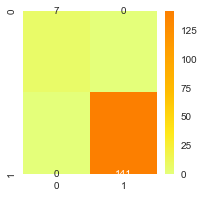

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       141

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



In [243]:
y_pred = RFC.predict(x_valid)

print("Training Accuracy :", RFC.score(x_train, y_train))
print("Testing Accuracy :", RFC.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_valid, y_pred)
print(cr)

In [244]:
y_pred_proba = RFC.predict_proba(x_valid)

In [245]:
print(y_pred_proba)

[[0.         1.        ]
 [0.1        0.9       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.9        0.1       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.9        0.1       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]


In [246]:
Acc = accuracy_score(y_valid,y_pred)

In [247]:
Acc

1.0

In [248]:
CnR = confusion_matrix(y_valid,y_pred)

In [249]:
CnR

array([[  7,   0],
       [  0, 141]], dtype=int64)

In [251]:
pred_test =  np.array(RFC.predict_proba(x_test)[:,1])

In [252]:
Res = pd.DataFrame(y_valid)

In [253]:
Res

,Absent
471,1
128,1
424,1
249,1
597,1
...,...
621,1
209,1
326,1
429,1


In [254]:
Res.to_csv('C:/Users/maniesh/Landmark/DLL Take Home Exercise/Sample.csv', index= False)

In [255]:
final_predictions = RFC.predict(x_valid)

In [256]:
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [257]:
Res['Absent'] = final_predictions

In [258]:
final_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [259]:
Res

,Absent
471,1
128,1
424,1
249,1
597,1
...,...
621,1
209,1
326,1
429,1


In [260]:
Res['Absent'] = Res['Absent'].apply(lambda x: 0 if x<0 else x)

In [261]:
Res

,Absent
471,1
128,1
424,1
249,1
597,1
...,...
621,1
209,1
326,1
429,1


In [262]:
Res['Absent'].value_counts()

1    141
0      7
Name: Absent, dtype: int64

In [263]:
Res

,Absent
471,1
128,1
424,1
249,1
597,1
...,...
621,1
209,1
326,1
429,1


In [265]:
Res.to_csv('C:/Users/maniesh/Landmark/DLL Take Home Exercise/Prediction.csv', index=False)

In [ ]:
## Based on the Precision, Accurace, Overfitting, XGBoost model is best model , 2nd Best model is the D-tree Model

In [ ]:
## Final prediction for the hold-out data is calculated inside the predicyion file

# What are the chief drivers behind nonattendance as per the model ?


In [448]:
feature_importances

,importance
Disciplinary_failure,0.483994
Absence_Reason,0.261347
Month_of_absence,0.041952
Body mass index,0.030903
Hit_target,0.029984
Day_of_the_week,0.025645
Weight,0.022296
Age,0.018905
Work_load_Average_per_day,0.017810
Distance_from_Office_to_Work,0.016744


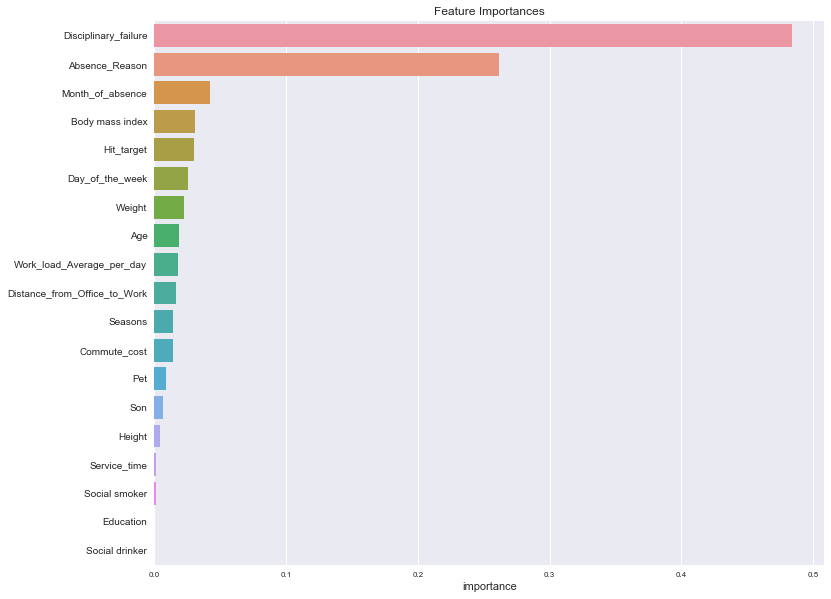

In [450]:
# Ploting the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

In [ ]:
## from above, below acts as Chief drivers impacting the target variable i.e Non-Attendence
# Disciplinary_failure
# Absence_Reason
# Month_of_absence
# Body mass index
# Hit_target
# Day_of_the_week
# Weight
# Age
# Work_load_Average_per_day
# Distance_from_Office_to_Work
# Seasons
# Commute_cost
# Pet
# Son


# How can you reduce nonattendance for employees ? Develop different strategies


In [ ]:
# 1st strategies - Analysing the insights of the employees in terms of creating postive work environment
# 2nd Strategies - Analyze the attendence based on important features which are stated above.
# One example is below for features like Disciplinary_failure

In [452]:
df

,ID,Absence_Reason,Month_of_absence,Day_of_the_week,Seasons,Commute_cost,Distance_from_Office_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,1
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,1
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [453]:
df.columns
# Calculate Absenct rates by different factors (e.g., Disciplinary_failure, Absence_Reason, Month_of_absence)

Index(['ID', 'Absence_Reason', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Commute_cost', 'Distance_from_Office_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absent'],
      dtype='object')

In [454]:
absent_rates = df.groupby('Disciplinary_failure')['Absent'].mean().sort_values(ascending=False)

In [455]:
absent_rates

Disciplinary_failure
0    0.994286
1    0.000000
Name: Absent, dtype: float64

In [ ]:
# Visualizing the absent rates

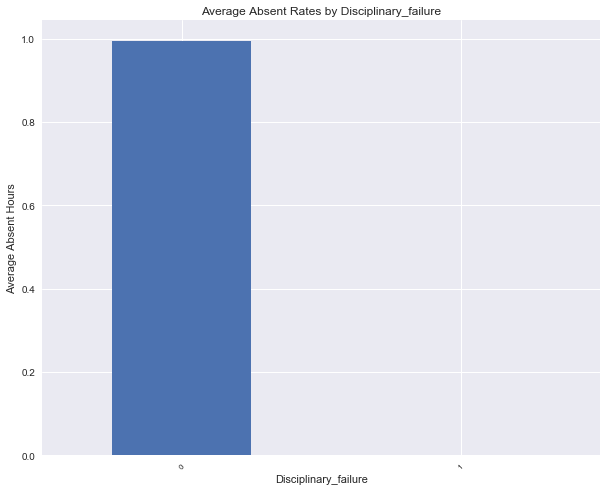

In [456]:
plt.figure(figsize=(10, 8))
absent_rates.plot(kind='bar')
plt.title('Average Absent Rates by Disciplinary_failure')
plt.xlabel('Disciplinary_failure')
plt.ylabel('Average Absent Hours')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Using similar ways we can analyze the patterns, trends and identify what drives the employees to be Absent